Import necessary libraries and various PREFFECT classes.

In [1]:
import sys
import os
import numpy as np
import torch

# load PREFFECT classes into the Jupyter Notebook
sys.path.insert(0, '/data/lab_vm/release/')
from preffect import *

# it's good practice to limit threads used per runs
num_processors = 2
torch.set_num_threads(num_processors)
torch.set_num_interop_threads(num_processors)

Initializing the PREFFECT factory:

Parameters can be set when initializing factory().

All parameters not implicitly set here will be read from `_config.py`.

In [2]:
fac = factory(visualize=True,                                
                                 type='full', # Choose your PREFFECT model type
                                 model_likelihood = 'NB', # NB or ZINB (the latter for data with high dropout rates)
                                 epochs = 3000,  # Number of epochs during training
                                 mini_batch_size = 50 , # num. of samples per minibatch
                                 correct_vars = True, # Include additional variables within the model 
                                 vars_to_correct = [('batch', 'categorical')],
                                 infer_lib_size = False, # have PREFFECT determine sample lib size
                                 # latent space sizing and parameters
                                 h = 8, # number of heads
                                 r_prime = 50, # intermediate hidden dimension [vignette has only 100 genes, so intermeidate set to 50]
                                 r = 20, # size of latent space
                                 r_embed = 5, # size of the embedding space for categorical correction variables.
                                 # intput/output
                                 input_anndata_path = '/data/lab_vm/release/preffect/vignettes/single/',
                                 input_inference_anndata_path = '/data/lab_vm/release/preffect/vignettes/single/train/',
                                 output_path = '/data/lab_vm/release/preffect/vignettes/vignette_output/'
)

Training your PREFFECT Model:

When completed, PREFFECT will display a plot of all losses computed during training.

Additional plots can be found in your output path (set parameter: "output_path").

In [ ]:
pr = fac.train()

Training Progress:  54%|█████▍    | 1632/3000 [10:35<20:29,  1.11it/s]

Inference (passing data through the trained PREFFECT model):

Inference is automatically performed after training. However, Inference can be repeated (see below).

Data used in inference is set by parameter "input_inference_anndata_path"

In [ ]:
pr = fac.inference()

Clustering:

PREFFECT provides clustering tools to visualize the inferred results.

Options are: 
- "latent" (cluster on the latent space)
- "counts" (cluster on inferred counts)
- "true_counts" (cluster on the true counts used for training)

ir_name: Choose inference implementation ("endogenous" is the name given to an inference without batch adjustment)

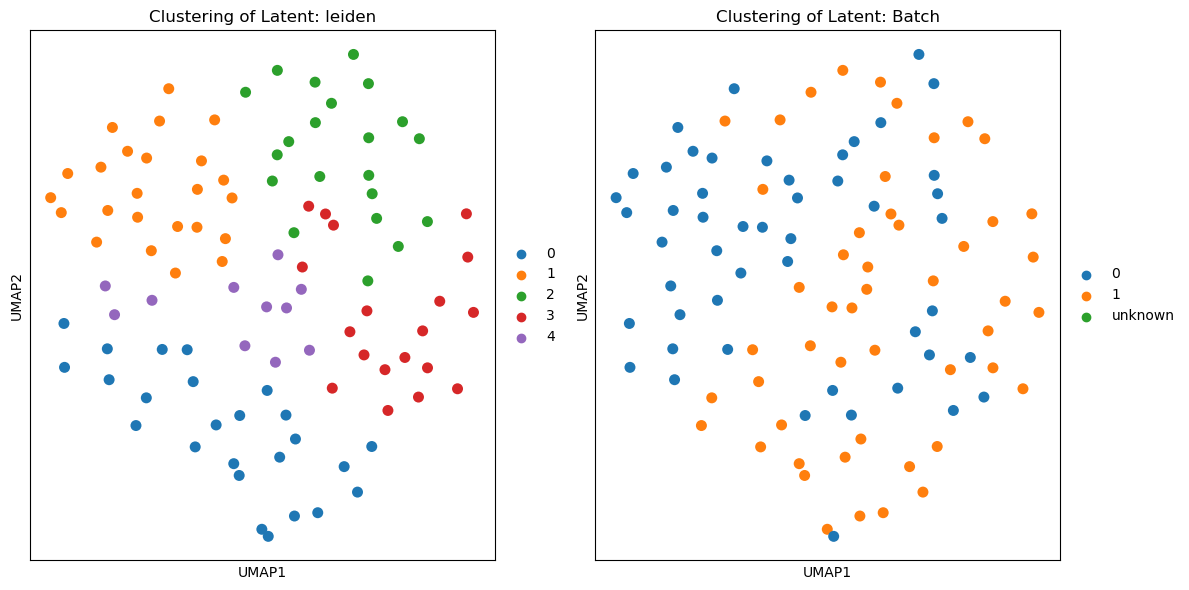

<Figure size 640x480 with 0 Axes>

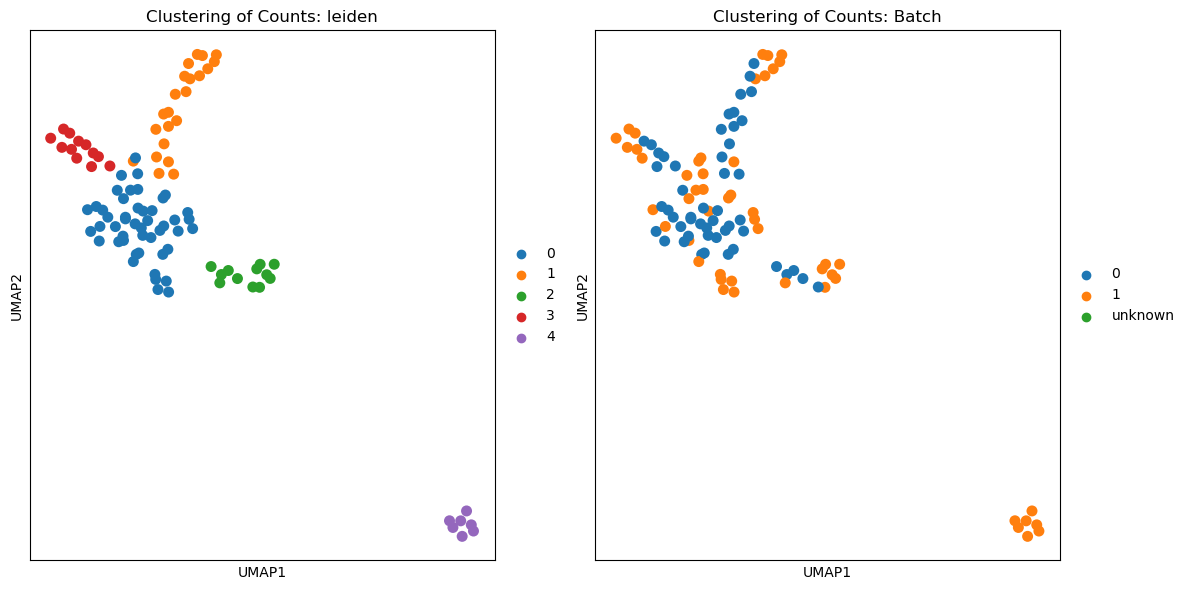

/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/UWO/emucaki/miniconda3/envs/ffpe_env_gpu/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


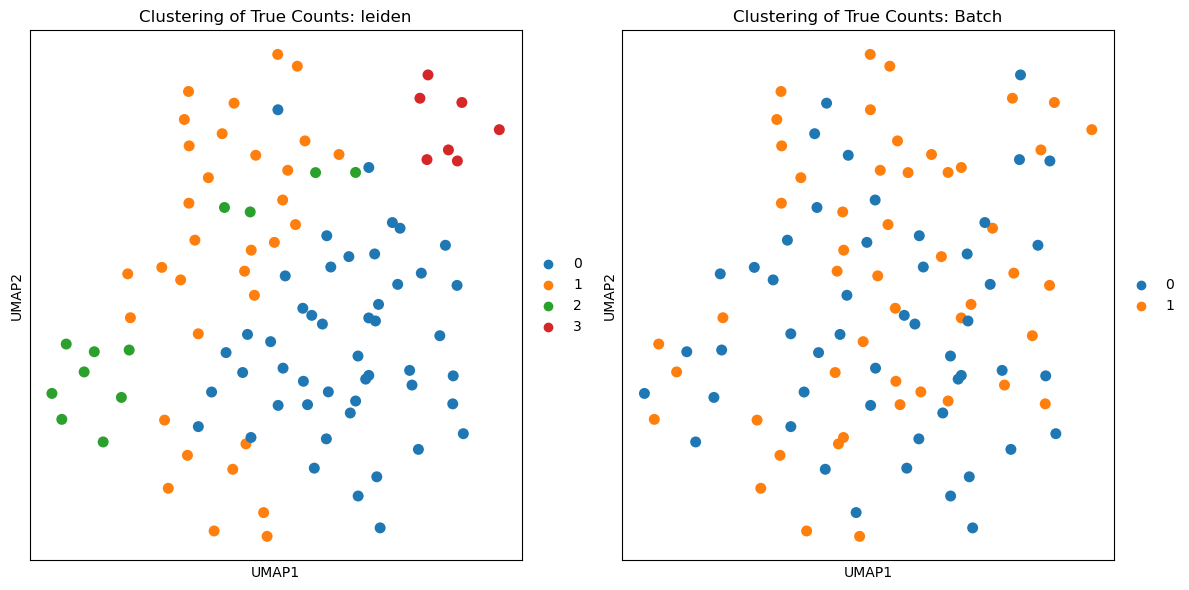

In [ ]:
# cluster on latent embeddings:
fac.cluster_samples("latent", ir_name="endogenous")

# cluster on observed counts:
fac.cluster_samples("counts", ir_name="endogenous")

# cluster on “true” counts:
fac.cluster_samples("true_counts", ir_name="endogenous")

Batch Adjustment:

PREFFECT allows one to adjust the model to treat all samples as if it were derived from a particular batch. 

In this dataset, two batches exist (batch 0 and 1). 

Here, we will set samples to all resemble "batch 0".

In [ ]:
# set what batch you wish your samples be adjusted to
fac.configs['adjust_vars'] = True
fac.configs['adjust_to_batch_level'] = 0

inf = fac.inference()

We use clustering to show that batch adjustment is having an effect.

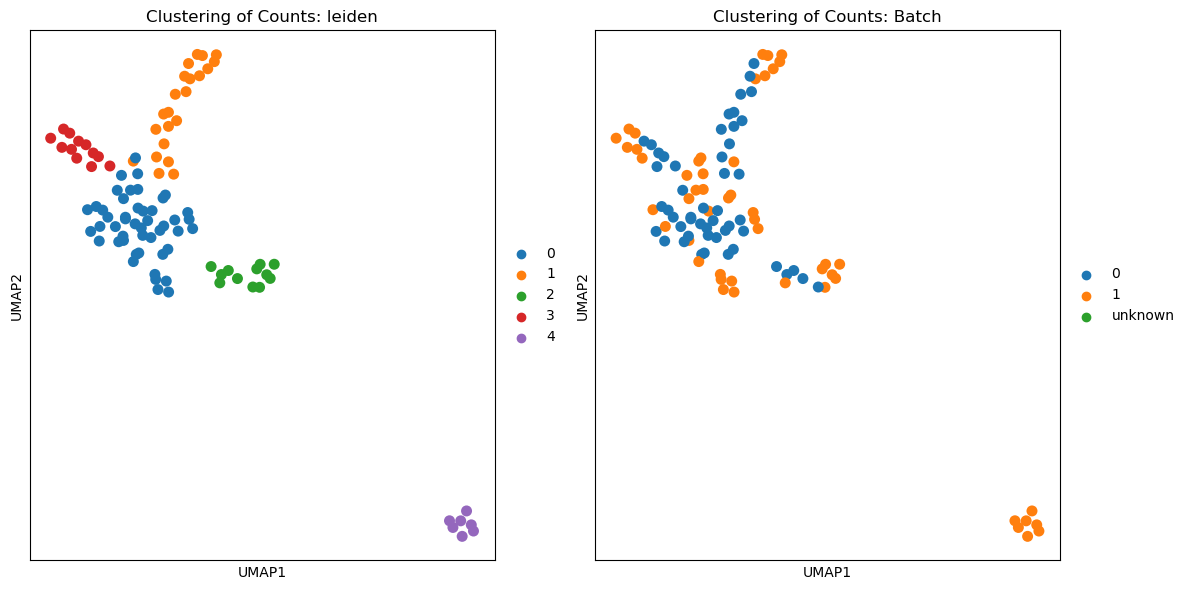

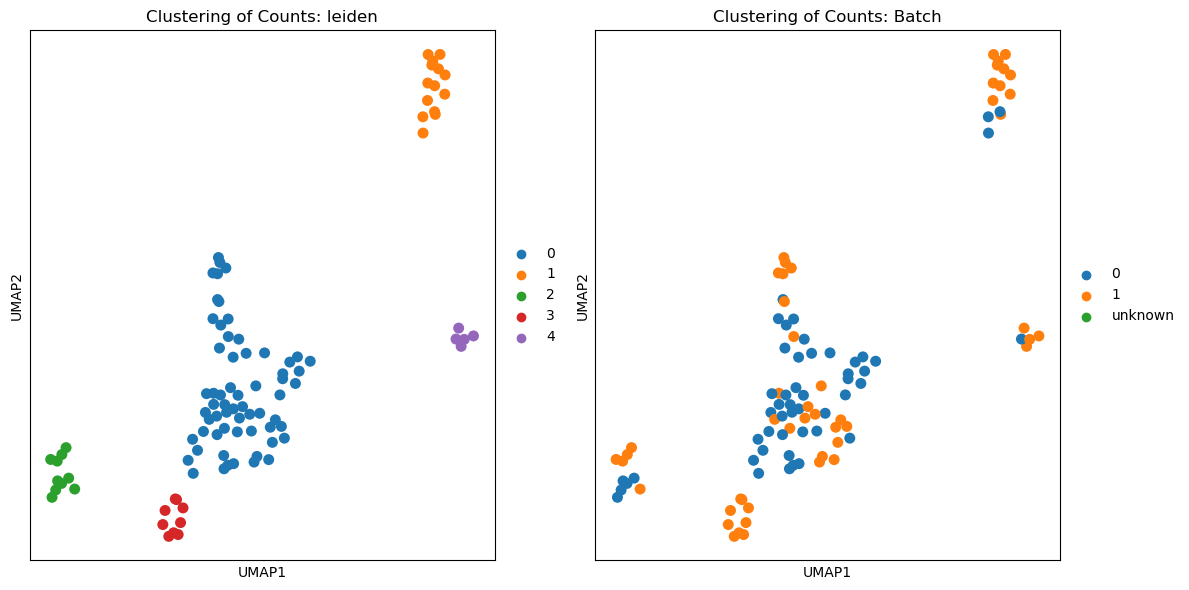

In [ ]:
# Before batch adjustment
fac.cluster_samples("counts", ir_name="endogenous", cluster_omega=False)

# After adjustment
fac.cluster_samples("counts", ir_name="inference_0", cluster_omega=False)
